# Lab 6. Data Transformation.

## What is tidy data? Hadley Wickham’s paper defines it as meeting the following criteria:
■ Each row is an observation.

■ Each column is a variable.

■ Each type of observational unit forms a table.

## This session will cover:

1. Pivoting/casting/spreading rows into columns (long to wide format)
2. Unpivoting/melting/gathering columns into rows (wide to long format)
3. Groupby on transformed data
4. Groupby on temporal data
5. Simple graphing

## 0. We need to upgrade pandas to the newest version

In [1]:
!pip3 install --upgrade pandas

Requirement already up-to-date: pandas in /Users/mohsenmosleh/anaconda3/envs/py37/lib/python3.7/site-packages (1.1.5)
You should consider upgrading via the '/Users/mohsenmosleh/anaconda3/envs/py37/bin/python -m pip install --upgrade pip' command.


# 1. Let's load some libraries

In [2]:
import pandas as pd

In [3]:
pd.__version__

'0.23.4'

In [4]:
from matplotlib.pyplot import figure

In [5]:
import seaborn as sns

# 2. Let's load and concatenate some datasets

In [6]:
## The air_quality_no2_long.csv data set provides 𝑁𝑂2 values for the measurement stations FR04014, BETR801 and London Westminster in respectively Paris, Antwerp and London.
air_quality_no2 = pd.read_csv('https://raw.githubusercontent.com/thousandoaks/BEMM458/master/data/air_quality_no2_long.csv',parse_dates=True)

In [7]:
## The air_quality_pm25_long.csv data set provides 𝑃𝑀25 values for the measurement stations FR04014, BETR801 and London Westminster in respectively Paris, Antwerp and London.

air_quality_pm25 = pd.read_csv('https://raw.githubusercontent.com/thousandoaks/BEMM458/master/data/air_quality_pm25_long.csv',parse_dates=True)

In [8]:
air_quality_no2.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [9]:
air_quality_pm25.head()

,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³


In [10]:
# you can sort by various columns or combination of columns
air_quality_no2.sort_values(by='date.utc',ascending=True).head()

,city,country,date.utc,location,parameter,value,unit
2067,London,GB,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,µg/m³
1098,Antwerpen,BE,2019-05-07 01:00:00+00:00,BETR801,no2,50.5,µg/m³
1003,Paris,FR,2019-05-07 01:00:00+00:00,FR04014,no2,25.0,µg/m³
1002,Paris,FR,2019-05-07 02:00:00+00:00,FR04014,no2,27.7,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


In [11]:
# you can sort by various columns or combination of columns
air_quality_no2.sort_values(by=['date.utc','city'],ascending=False).head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [12]:
#lets concatinate the dataframe of pm25 and no2 to create a longer dataframe containing both parameters
air_quality = pd.concat([air_quality_pm25, air_quality_no2], axis=0)

In [13]:
air_quality_no2.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [14]:
air_quality_pm25.shape,air_quality_no2.shape,air_quality.shape

((1110, 7), (2068, 7), (3178, 7))

# 3. From long to wide form Dataframes: Pivot operations 

### the following figure provides a visual representation of the operation we want to perform
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/reshaping_pivot.png">



In [15]:
air_quality_no2.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


### What about having cities as columns instead of rows?

In [16]:
air_quality_no2_pivoted=air_quality_no2.pivot(index='date.utc', columns='city', values='value')

In [17]:
air_quality_no2_pivoted.shape,air_quality_no2.shape

((1033, 3), (2068, 7))

In [18]:
air_quality_no2_pivoted.head()

city,Antwerpen,London,Paris
date.utc,,,
2019-05-07 01:00:00+00:00,50.5,23.0,25.0
2019-05-07 02:00:00+00:00,45.0,19.0,27.7
2019-05-07 03:00:00+00:00,NaN,19.0,50.4
2019-05-07 04:00:00+00:00,NaN,16.0,61.9
2019-05-07 05:00:00+00:00,NaN,NaN,72.4


<Figure size 2880x2160 with 0 Axes>

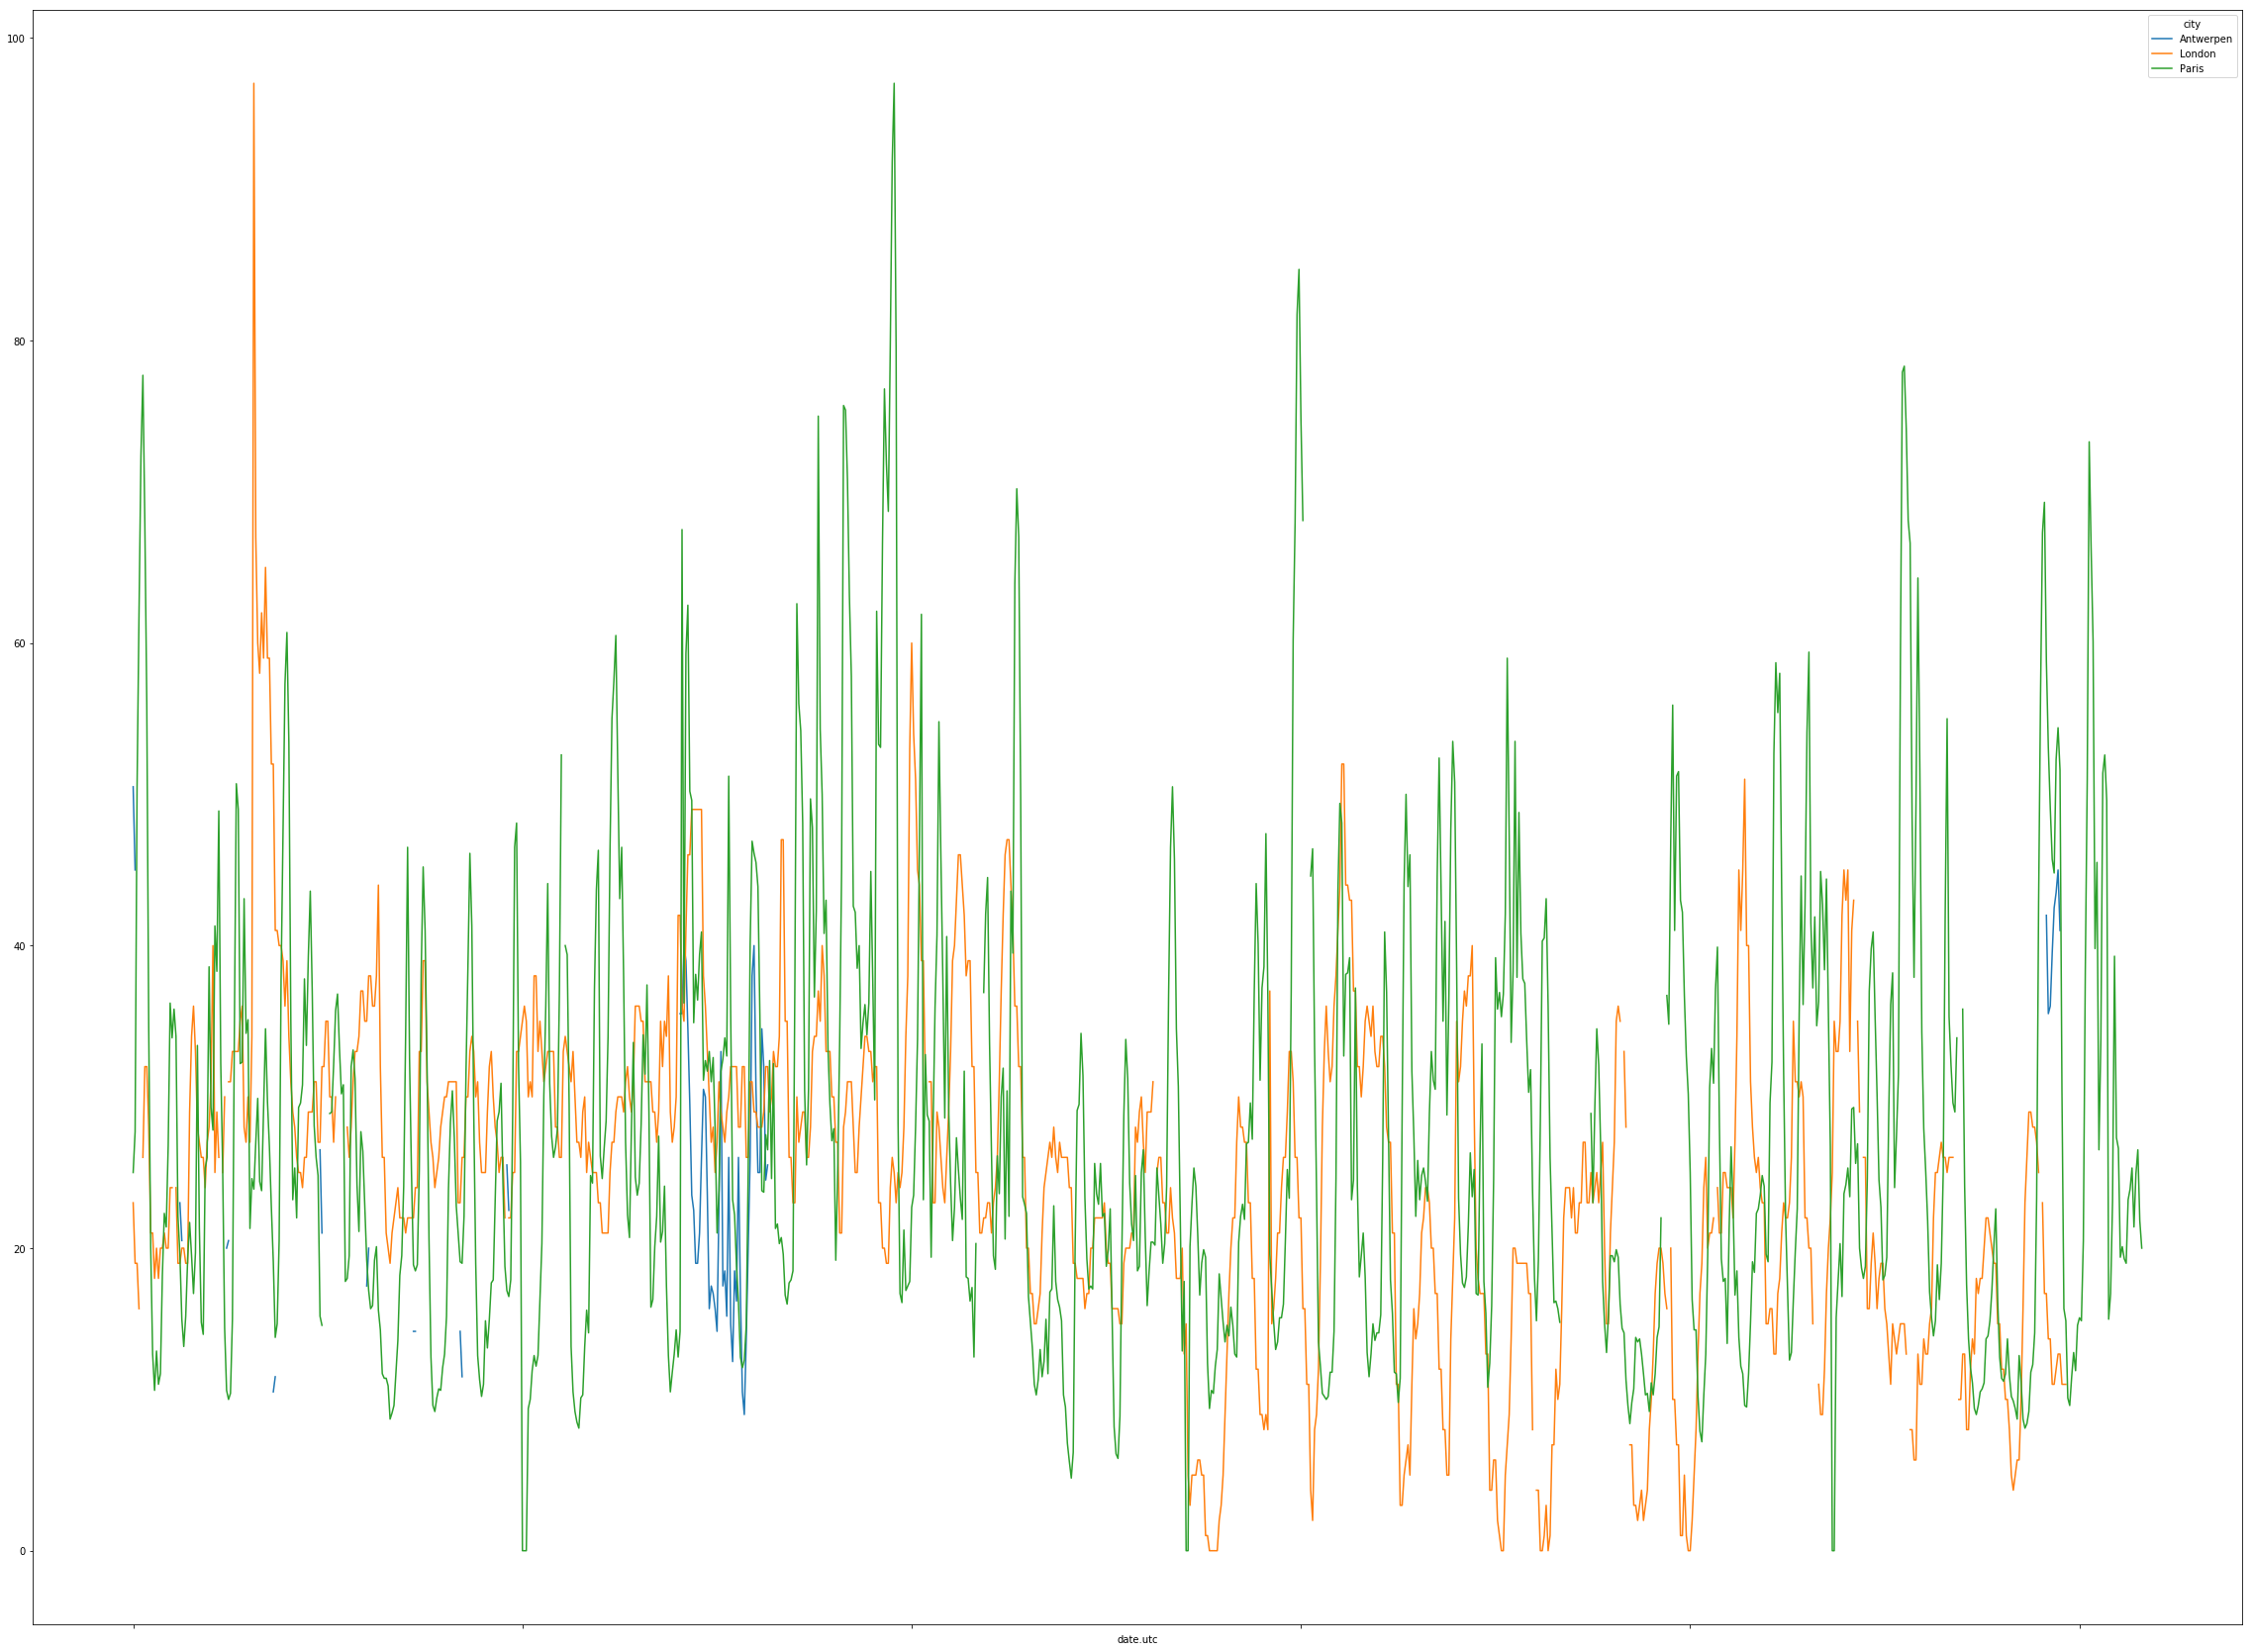

In [19]:
figure(figsize=(40,30))
air_quality_no2_pivoted.plot(figsize=(40,30))

In [20]:
air_quality.head()

,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³


### What about having seperate columns for different paramaters, namely, no2 and pm25?

In [21]:
air_quality_pivoted=air_quality.pivot_table(
        values='value', 
        index=['city', 'date.utc','country','location'], 
        columns='parameter')

In [22]:
air_quality.shape,air_quality_pivoted.shape

((3178, 7), (2117, 2))

In [23]:
air_quality_pivoted

parameter                                              no2  pm25
city      date.utc                  country location            
Antwerpen 2019-05-07 01:00:00+00:00 BE      BETR801   50.5  12.5
          2019-05-07 02:00:00+00:00 BE      BETR801   45.0  14.0
          2019-05-08 01:00:00+00:00 BE      BETR801   23.0  14.5
          2019-05-08 02:00:00+00:00 BE      BETR801   20.5  14.0
          2019-05-09 01:00:00+00:00 BE      BETR801   20.0   4.5
          2019-05-09 02:00:00+00:00 BE      BETR801   20.5   3.5
          2019-05-10 01:00:00+00:00 BE      BETR801   10.5  11.5
          2019-05-10 02:00:00+00:00 BE      BETR801   11.5  13.5
          2019-05-11 01:00:00+00:00 BE      BETR801   26.5  17.0
          2019-05-11 02:00:00+00:00 BE      BETR801   21.0  19.5
          2019-05-12 01:00:00+00:00 BE      BETR801   17.5   6.0
          2019-05-12 02:00:00+00:00 BE      BETR801   20.0   6.0
          2019-05-13 01:00:00+00:00 BE      BETR801   14.5   5.0
          2019-05-13 02:00:00+00:00 BE      BETR801   14.5   5.5
          2019-05-14 01:00:00+00:00 BE      BETR801   14.5   4.0
          2019-05-14 02:00:00+00:00 BE      BETR801   11.5   4.0
          2019-05-15 01:00:00+00:00 BE      BETR801   25.5  13.0
          2019-05-15 02:00:00+00:00 BE      BETR801   22.5  12.5
          2019-05-16 01:00:00+00:00 BE      BETR801   28.0  11.0
          2019-05-17 01:00:00+00:00 BE      BETR801    NaN  13.5
          2019-05-18 01:00:00+00:00 BE      BETR801   41.5  24.0
          2019-05-18 18:00:00+00:00 BE      BETR801   35.5  37.0
          2019-05-18 19:00:00+00:00 BE      BETR801   35.5  36.5
          2019-05-18 20:00:00+00:00 BE      BETR801   40.0  41.0
          2019-05-18 21:00:00+00:00 BE      BETR801   39.0  40.5
          2019-05-18 22:00:00+00:00 BE      BETR801   34.5  42.0
          2019-05-18 23:00:00+00:00 BE      BETR801   29.5  45.5
          2019-05-19 00:00:00+00:00 BE      BETR801   23.5  49.5
          2019-05-19 01:00:00+00:00 BE      BETR801   22.5  52.0
          2019-05-19 02:00:00+00:00 BE      BETR801   19.0  51.5
...                                                    ...   ...
Paris     2019-06-17 21:00:00+00:00 FR      FR04014   38.3   NaN
          2019-06-17 22:00:00+00:00 FR      FR04014   51.0   NaN
          2019-06-17 23:00:00+00:00 FR      FR04014   73.3   NaN
          2019-06-18 00:00:00+00:00 FR      FR04014   66.2   NaN
          2019-06-18 01:00:00+00:00 FR      FR04014   60.1   NaN
          2019-06-18 02:00:00+00:00 FR      FR04014   39.8   NaN
          2019-06-18 03:00:00+00:00 FR      FR04014   45.5   NaN
          2019-06-18 04:00:00+00:00 FR      FR04014   26.5   NaN
          2019-06-18 05:00:00+00:00 FR      FR04014   33.8   NaN
          2019-06-18 06:00:00+00:00 FR      FR04014   51.4   NaN
          2019-06-18 07:00:00+00:00 FR      FR04014   52.6   NaN
          2019-06-18 08:00:00+00:00 FR      FR04014   49.6   NaN
          2019-06-18 19:00:00+00:00 FR      FR04014   15.3   NaN
          2019-06-18 20:00:00+00:00 FR      FR04014   17.0   NaN
          2019-06-18 21:00:00+00:00 FR      FR04014   23.1   NaN
          2019-06-18 22:00:00+00:00 FR      FR04014   39.3   NaN
          2019-06-19 09:00:00+00:00 FR      FR04014   27.3   NaN
          2019-06-19 10:00:00+00:00 FR      FR04014   26.6   NaN
          2019-06-20 13:00:00+00:00 FR      FR04014   19.4   NaN
          2019-06-20 14:00:00+00:00 FR      FR04014   20.1   NaN
          2019-06-20 15:00:00+00:00 FR      FR04014   19.3   NaN
          2019-06-20 16:00:00+00:00 FR      FR04014   19.0   NaN
          2019-06-20 17:00:00+00:00 FR      FR04014   23.2   NaN
          2019-06-20 18:00:00+00:00 FR      FR04014   23.9   NaN
          2019-06-20 19:00:00+00:00 FR      FR04014   25.3   NaN
          2019-06-20 20:00:00+00:00 FR      FR04014   21.4   NaN
          2019-06-20 21:00:00+00:00 FR      FR04014   24.9   NaN
          2019-06-20 22:00:00+00:00 FR      FR04014   26.5   NaN
          2019-06-20 23:00:00+00:00

### Task: Transform the data set such that for each sample time, country, and location, you have columns for 
### different cities, and parameters

# 4. From wide to long form: Melt operations

### the following figure provides a visual representation of the operation we want to perform
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/reshaping_melt.png">

In [24]:
air_quality_no2_pivoted.head()

city,Antwerpen,London,Paris
date.utc,,,
2019-05-07 01:00:00+00:00,50.5,23.0,25.0
2019-05-07 02:00:00+00:00,45.0,19.0,27.7
2019-05-07 03:00:00+00:00,NaN,19.0,50.4
2019-05-07 04:00:00+00:00,NaN,16.0,61.9
2019-05-07 05:00:00+00:00,NaN,NaN,72.4


In [25]:
# we need to extract the index to a new column
air_quality_no2_pivoted.reset_index( inplace=True)

In [26]:
air_quality_no2_pivoted.head()

city,date.utc,Antwerpen,London,Paris
0,2019-05-07 01:00:00+00:00,50.5,23.0,25.0
1,2019-05-07 02:00:00+00:00,45.0,19.0,27.7
2,2019-05-07 03:00:00+00:00,NaN,19.0,50.4
3,2019-05-07 04:00:00+00:00,NaN,16.0,61.9
4,2019-05-07 05:00:00+00:00,NaN,NaN,72.4


In [27]:
air_quality_no2_pivoted_melted=air_quality_no2_pivoted.melt(id_vars=['date.utc'])

In [28]:
air_quality_no2_pivoted.shape,air_quality_no2_pivoted_melted.shape

((1033, 4), (3099, 3))

In [29]:
air_quality_no2_pivoted_melted.head()

,date.utc,city,value
0,2019-05-07 01:00:00+00:00,Antwerpen,50.5
1,2019-05-07 02:00:00+00:00,Antwerpen,45.0
2,2019-05-07 03:00:00+00:00,Antwerpen,NaN
3,2019-05-07 04:00:00+00:00,Antwerpen,NaN
4,2019-05-07 05:00:00+00:00,Antwerpen,NaN


## The previous format is it usually known as the "long form", it is usually the one required for most libraries in Python

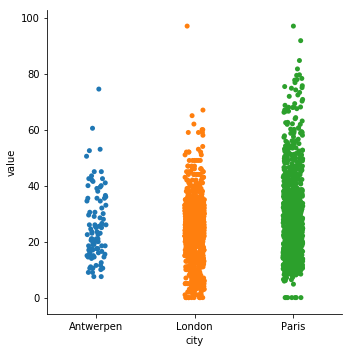

In [30]:
sns.catplot(x="city", y="value", data=air_quality_no2_pivoted_melted);

In [31]:
air_quality_pivoted.head()

parameter                                              no2  pm25
city      date.utc                  country location            
Antwerpen 2019-05-07 01:00:00+00:00 BE      BETR801   50.5  12.5
          2019-05-07 02:00:00+00:00 BE      BETR801   45.0  14.0
          2019-05-08 01:00:00+00:00 BE      BETR801   23.0  14.5
          2019-05-08 02:00:00+00:00 BE      BETR801   20.5  14.0
          2019-05-09 01:00:00+00:00 BE      BETR801   20.0   4.5

In [32]:
air_quality_pivoted.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2117 entries, (Antwerpen, 2019-05-07 01:00:00+00:00, BE, BETR801) to (Paris, 2019-06-21 00:00:00+00:00, FR, FR04014)
Data columns (total 2 columns):
no2     2068 non-null float64
pm25    1110 non-null float64
dtypes: float64(2)
memory usage: 52.0+ KB


In [33]:
air_quality_pivoted.reset_index(inplace=True)

In [34]:
air_quality_pivoted.head()

parameter,city,date.utc,country,location,no2,pm25
0,Antwerpen,2019-05-07 01:00:00+00:00,BE,BETR801,50.5,12.5
1,Antwerpen,2019-05-07 02:00:00+00:00,BE,BETR801,45.0,14.0
2,Antwerpen,2019-05-08 01:00:00+00:00,BE,BETR801,23.0,14.5
3,Antwerpen,2019-05-08 02:00:00+00:00,BE,BETR801,20.5,14.0
4,Antwerpen,2019-05-09 01:00:00+00:00,BE,BETR801,20.0,4.5


### Task: trasform air_quality_pivoted into the original long format where we parameter and values

## 5. Groupby operation
### Lets do some group operation on this data!

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

In [35]:
air_quality.head()

,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³


### 5.1. We group by a single column then we count 

In [36]:
air_quality.groupby('city').count()

,country,date.utc,location,parameter,value,unit
city,,,,,,
Antwerpen,196,196,196,196,196,196
London,1978,1978,1978,1978,1978,1978
Paris,1004,1004,1004,1004,1004,1004


In [37]:
air_quality.groupby('country').count()

,city,date.utc,location,parameter,value,unit
country,,,,,,
BE,196,196,196,196,196,196
FR,1004,1004,1004,1004,1004,1004
GB,1978,1978,1978,1978,1978,1978


In [38]:
air_quality.groupby('parameter').count()

,city,country,date.utc,location,value,unit
parameter,,,,,,
no2,2068,2068,2068,2068,2068,2068
pm25,1110,1110,1110,1110,1110,1110


### 5.2. We group by two columns then we count 

In [39]:
air_quality.groupby(['city','parameter']).count()

country  date.utc  location  value  unit
city      parameter                                          
Antwerpen no2             95        95        95     95    95
          pm25           101       101       101    101   101
London    no2            969       969       969    969   969
          pm25          1009      1009      1009   1009  1009
Paris     no2           1004      1004      1004   1004  1004

### 5.3. We group by several column then apply some functions

In [40]:
air_quality.groupby(['city','parameter']).mean()

value
city      parameter           
Antwerpen no2        25.778947
          pm25       21.504950
London    no2        24.777090
          pm25        8.993062
Paris     no2        27.740538

In [41]:
air_quality.groupby(['city','parameter']).max()

country                   date.utc            location  \
city      parameter                                                          
Antwerpen no2            BE  2019-06-17 08:00:00+00:00             BETR801   
          pm25           BE  2019-06-18 06:00:00+00:00             BETR801   
London    no2            GB  2019-06-17 11:00:00+00:00  London Westminster   
          pm25           GB  2019-06-21 00:00:00+00:00  London Westminster   
Paris     no2            FR  2019-06-21 00:00:00+00:00             FR04014   

                     value   unit  
city      parameter                
Antwerpen no2         74.5  µg/m³  
          pm25        60.0  µg/m³  
London    no2         97.0  µg/m³  
          pm25        20.0  µg/m³  
Paris     no2         97.0  µg/m³

In [42]:
air_quality.groupby(['city','parameter']).min()

country                   date.utc            location  \
city      parameter                                                          
Antwerpen no2            BE  2019-05-07 01:00:00+00:00             BETR801   
          pm25           BE  2019-05-07 01:00:00+00:00             BETR801   
London    no2            GB  2019-05-07 01:00:00+00:00  London Westminster   
          pm25           GB  2019-05-07 01:00:00+00:00  London Westminster   
Paris     no2            FR  2019-05-07 01:00:00+00:00             FR04014   

                     value   unit  
city      parameter                
Antwerpen no2          7.5  µg/m³  
          pm25         3.0  µg/m³  
London    no2          0.0  µg/m³  
          pm25         5.0  µg/m³  
Paris     no2          0.0  µg/m³

In [43]:
air_quality.groupby(['city','location','parameter']).mean()

value
city      location           parameter           
Antwerpen BETR801            no2        25.778947
                             pm25       21.504950
London    London Westminster no2        24.777090
                             pm25        8.993062
Paris     FR04014            no2        27.740538

In [44]:
air_quality.groupby(['city','date.utc','parameter']).mean()

value
city      date.utc                  parameter       
Antwerpen 2019-05-07 01:00:00+00:00 no2         50.5
                                    pm25        12.5
          2019-05-07 02:00:00+00:00 no2         45.0
                                    pm25        14.0
          2019-05-08 01:00:00+00:00 no2         23.0
                                    pm25        14.5
          2019-05-08 02:00:00+00:00 no2         20.5
                                    pm25        14.0
          2019-05-09 01:00:00+00:00 no2         20.0
                                    pm25         4.5
          2019-05-09 02:00:00+00:00 no2         20.5
                                    pm25         3.5
          2019-05-10 01:00:00+00:00 no2         10.5
                                    pm25        11.5
          2019-05-10 02:00:00+00:00 no2         11.5
                                    pm25        13.5
          2019-05-11 01:00:00+00:00 no2         26.5
                                    pm25        17.0
          2019-05-11 02:00:00+00:00 no2         21.0
                                    pm25        19.5
          2019-05-12 01:00:00+00:00 no2         17.5
                                    pm25         6.0
          2019-05-12 02:00:00+00:00 no2         20.0
                                    pm25         6.0
          2019-05-13 01:00:00+00:00 no2         14.5
                                    pm25         5.0
          2019-05-13 02:00:00+00:00 no2         14.5
                                    pm25         5.5
          2019-05-14 01:00:00+00:00 no2         14.5
                                    pm25         4.0
...                                              ...
Paris     2019-06-17 21:00:00+00:00 no2         38.3
          2019-06-17 22:00:00+00:00 no2         51.0
          2019-06-17 23:00:00+00:00 no2         73.3
          2019-06-18 00:00:00+00:00 no2         66.2
          2019-06-18 01:00:00+00:00 no2         60.1
          2019-06-18 02:00:00+00:00 no2         39.8
          2019-06-18 03:00:00+00:00 no2         45.5
          2019-06-18 04:00:00+00:00 no2         26.5
          2019-06-18 05:00:00+00:00 no2         33.8
          2019-06-18 06:00:00+00:00 no2         51.4
          2019-06-18 07:00:00+00:00 no2         52.6
          2019-06-18 08:00:00+00:00 no2         49.6
          2019-06-18 19:00:00+00:00 no2         15.3
          2019-06-18 20:00:00+00:00 no2         17.0
          2019-06-18 21:00:00+00:00 no2         23.1
          2019-06-18 22:00:00+00:00 no2         39.3
          2019-06-19 09:00:00+00:00 no2         27.3
          2019-06-19 10:00:00+00:00 no2         26.6
          2019-06-20 13:00:00+00:00 no2         19.4
          2019-06-20 14:00:00+00:00 no2         20.1
          2019-06-20 15:00:00+00:00 no2         19.3
          2019-06-20 16:00:00+00:00 no2         19.0
          2019-06-20 17:00:00+00:00 no2         23.2
          2019-06-20 18:00:00+00:00 no2         23.9
          2019-06-20 19:00:00+00:00 no2         25.3
          2019-06-20 20:00:00+00:00 no2         21.4
          2019-06-20 21:00:00+00:00 no2         24.9
          2019-06-20 22:00:00+00:00 no2         26.5
          2019-06-20 23:00:00+00:00 no2         21.8
          2019-06-21 00:00:00+00:00 no2         20.0

[3178 rows x 1 columns]

In [45]:
# We can do multiple basic stats in the same operations

air_quality.groupby(['city','date.utc','parameter']).agg(['max','min','mean'])

value            
                                                max   min  mean
city      date.utc                  parameter                  
Antwerpen 2019-05-07 01:00:00+00:00 no2        50.5  50.5  50.5
                                    pm25       12.5  12.5  12.5
          2019-05-07 02:00:00+00:00 no2        45.0  45.0  45.0
                                    pm25       14.0  14.0  14.0
          2019-05-08 01:00:00+00:00 no2        23.0  23.0  23.0
                                    pm25       14.5  14.5  14.5
          2019-05-08 02:00:00+00:00 no2        20.5  20.5  20.5
                                    pm25       14.0  14.0  14.0
          2019-05-09 01:00:00+00:00 no2        20.0  20.0  20.0
                                    pm25        4.5   4.5   4.5
          2019-05-09 02:00:00+00:00 no2        20.5  20.5  20.5
                                    pm25        3.5   3.5   3.5
          2019-05-10 01:00:00+00:00 no2        10.5  10.5  10.5
                                    pm25       11.5  11.5  11.5
          2019-05-10 02:00:00+00:00 no2        11.5  11.5  11.5
                                    pm25       13.5  13.5  13.5
          2019-05-11 01:00:00+00:00 no2        26.5  26.5  26.5
                                    pm25       17.0  17.0  17.0
          2019-05-11 02:00:00+00:00 no2        21.0  21.0  21.0
                                    pm25       19.5  19.5  19.5
          2019-05-12 01:00:00+00:00 no2        17.5  17.5  17.5
                                    pm25        6.0   6.0   6.0
          2019-05-12 02:00:00+00:00 no2        20.0  20.0  20.0
                                    pm25        6.0   6.0   6.0
          2019-05-13 01:00:00+00:00 no2        14.5  14.5  14.5
                                    pm25        5.0   5.0   5.0
          2019-05-13 02:00:00+00:00 no2        14.5  14.5  14.5
                                    pm25        5.5   5.5   5.5
          2019-05-14 01:00:00+00:00 no2        14.5  14.5  14.5
                                    pm25        4.0   4.0   4.0
...                                             ...   ...   ...
Paris     2019-06-17 21:00:00+00:00 no2        38.3  38.3  38.3
          2019-06-17 22:00:00+00:00 no2        51.0  51.0  51.0
          2019-06-17 23:00:00+00:00 no2        73.3  73.3  73.3
          2019-06-18 00:00:00+00:00 no2        66.2  66.2  66.2
          2019-06-18 01:00:00+00:00 no2        60.1  60.1  60.1
          2019-06-18 02:00:00+00:00 no2        39.8  39.8  39.8
          2019-06-18 03:00:00+00:00 no2        45.5  45.5  45.5
          2019-06-18 04:00:00+00:00 no2        26.5  26.5  26.5
          2019-06-18 05:00:00+00:00 no2        33.8  33.8  33.8
          2019-06-18 06:00:00+00:00 no2        51.4  51.4  51.4
          2019-06-18 07:00:00+00:00 no2        52.6  52.6  52.6
          2019-06-18 08:00:00+00:00 no2        49.6  49.6  49.6
          2019-06-18 19:00:00+00:00 no2        15.3  15.3  15.3
          2019-06-18 20:00:00+00:00 no2        17.0  17.0  17.0
          2019-06-18 21:00:00+00:00 no2        23.1  23.1  23.1
          2019-06-18 22:00:00+00:00 no2        39.3  39.3  39.3
          2019-06-19 09:00:00+00:00 no2        27.3  27.3  27.3
          2019-06-19 10:00:00+00:00 no2        26.6  26.6  26.6
          2019-06-20 13:00:00+00:00 no2        19.4  19.4  19.4
          2019-06-20 14:00:00+00:00 no2        20.1  20.1  20.1
          2019-06-20 15:00:00+00:00 no2        19.3  19.3  19.3
          2019-06-20 16:00:00+00:00 no2        19.0  19.0  19.0
          2019-06-20 17:00:00+00:00 no2        23.2  23.2  23.2
          2019-06-20 18:00:00+00:00 no2        23.9  23.9  23.9
          2019-06-20 19:00:00+00:00 no2        25.3  25.3  25.3
          2019-06-20 20:00:00+00:00 no2        21.4  21.4  21.4
          2019-06-20 21:00:00+00:00 no2        24.9  24.9  24.9
          2019-06-20 22:00:00+00:00 no2        26.5  26.5  26.5
          2019-06-20 23:00:00+00:00 no2        21.8  21.8  21.8
          2019

## 6. Groupby on temporal data 

## This is usefuly  for instance to find the means of pollution values on a monthly basis

In [46]:
air_quality.head()

,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³


## Let's convert date.utc to datetime 

In [49]:
air_quality['date_formatted']=pd.to_datetime(air_quality['date.utc'])

In [51]:
# lets remove 'date.utc' columns
air_quality.drop('date.utc',inplace=True,axis=1)

KeyError: "['date.utc'] not found in axis"

In [53]:
### groupper is used to group by day
air_quality_daily=air_quality.groupby(['city','country','location','parameter','unit',pd.Grouper(key='date_formatted',freq='1D')]).mean()

### Read more about pd.Grouper here : 

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html

### You can use to collapse your time/date columns into different intervals

In [55]:
air_quality_daily

value
city      country location parameter unit  date_formatted           
Antwerpen BE      BETR801  no2       µg/m³ 2019-05-07      47.750000
                                           2019-05-08      21.750000
                                           2019-05-09      20.250000
                                           2019-05-10      11.000000
                                           2019-05-11      23.750000
                                           2019-05-12      18.750000
                                           2019-05-13      14.500000
                                           2019-05-14      13.000000
                                           2019-05-15      24.000000
                                           2019-05-16      28.000000
                                           2019-05-18      36.500000
                                           2019-05-19      20.500000
                                           2019-05-20      24.843750
                                           2019-05-21      15.500000
                                           2019-05-22      20.500000
                                           2019-05-23      60.500000
                                           2019-05-24      74.500000
                                           2019-05-25      29.000000
                                           2019-05-26      53.000000
                                           2019-05-27      10.500000
                                           2019-05-28      11.000000
                                           2019-05-29      21.000000
                                           2019-05-30       7.500000
                                           2019-05-31       9.000000
                                           2019-06-01      52.500000
                                           2019-06-05      15.000000
                                           2019-06-09      10.000000
                                           2019-06-10      18.500000
                                           2019-06-11       7.500000
                                           2019-06-12      21.000000
...                                                              ...
Paris     FR      FR04014  no2       µg/m³ 2019-05-23      46.404167
                                           2019-05-24      29.195833
                                           2019-05-25      32.090476
                                           2019-05-26      19.200000
                                           2019-05-27      19.850000
                                           2019-05-28      20.020833
                                           2019-05-29      23.958333
                                           2019-05-30      17.012500
                                           2019-05-31      32.550000
                                           2019-06-01      32.338095
                                           2019-06-02      23.383333
                                           2019-06-03      27.891667
                                           2019-06-04      30.529167
                                           2019-06-05      34.829167
                                           2019-06-06      25.046667
                                           2019-06-07      21.044444
                                           2019-06-08      15.854545
                                           2019-06-09      28.958333
                                           2019-06-10      18.416667
                                           2019-06-11      34.945833
                                           2019-06-12      27.525000
                                           2019-06-13      32.795833
                                           2019-06-14      36.466667
                                           2019-06-15      17.657143
                                           2019-06-16      17.262500
                                           2019-06-17      34

In [56]:
air_quality_daily.reset_index(inplace=True)

In [57]:
air_quality_daily

,city,country,location,parameter,unit,date_formatted,value
0,Antwerpen,BE,BETR801,no2,µg/m³,2019-05-07,47.750000
1,Antwerpen,BE,BETR801,no2,µg/m³,2019-05-08,21.750000
2,Antwerpen,BE,BETR801,no2,µg/m³,2019-05-09,20.250000
3,Antwerpen,BE,BETR801,no2,µg/m³,2019-05-10,11.000000
4,Antwerpen,BE,BETR801,no2,µg/m³,2019-05-11,23.750000
5,Antwerpen,BE,BETR801,no2,µg/m³,2019-05-12,18.750000
6,Antwerpen,BE,BETR801,no2,µg/m³,2019-05-13,14.500000
7,Antwerpen,BE,BETR801,no2,µg/m³,2019-05-14,13.000000
8,Antwerpen,BE,BETR801,no2,µg/m³,2019-05-15,24.000000
9,Antwerpen,BE,BETR801,no2,µg/m³,2019-05-16,28.000000


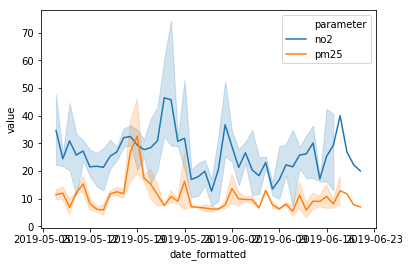

In [58]:
sns.lineplot(data = air_quality_daily,x="date_formatted", y="value", hue='parameter')